In [ ]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 3.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e9fd3efb146f9116db6435250fb1513a261ed57e4bd169e63c25756924dd101a
  Stored in directory: c:\users\anias\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [ ]:
import os
data = []
labels = []
classes = 43
cur_path = "C:\\Users\\anias\\Desktop\\gtsb"

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [ ]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Epoch 1/15
981/981 [==============================] - 91s 92ms/step - loss: 1.9778 - accuracy: 0.5039 - val_loss: 0.5690 - val_accuracy: 0.8744
Epoch 2/15
981/981 [==============================] - 89s 91ms/step - loss: 0.8246 - accuracy: 0.7576 - val_loss: 0.2636 - val_accuracy: 0.9274
Epoch 3/15
981/981 [==============================] - 88s 90ms/step - loss: 0.5358 - accuracy: 0.8394 - val_loss: 0.1823 - val_accuracy: 0.9457
Epoch 4/15
981/981 [==============================] - 557s 568ms/step - loss: 0.3811 - accuracy: 0.8877 - val_loss: 0.1741 - val_accuracy: 0.9521
Epoch 5/15
981/981 [==============================] - 91s 93ms/step - loss: 0.3102 - accuracy: 0.9104 - val_loss: 0.0955 - val_accuracy: 0.9731
Epoch 6/15
981/981 [==============================] - 83s 84ms/step - loss: 0.2728 - accuracy: 0.9192 - val_loss: 0.0804 - val_accuracy: 0.9767
Epoch 7/15
981/981 [==============================] - 82s 84ms/step - loss: 0.2421 - accuracy: 0.9312 - val_loss: 0.0751 - val_accurac

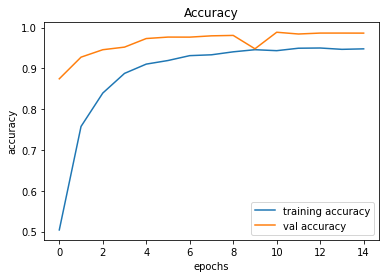

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

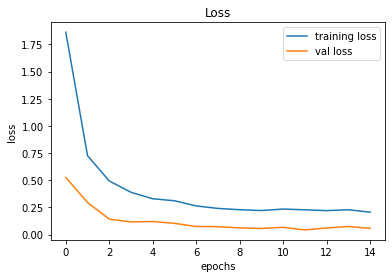

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv("C:\\Users\\anias\\Desktop\\gtsb\\Test.csv")
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
  image = Image.open(img)
  image = image.resize((30,30))
  data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)

395/395 [==============================] - 4s 10ms/step


In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9454473475851148


In [ ]:
model.save("traffic_classifier.h5")

NameError: name 'tk' is not defined